# Shekhar K. et al. mouse retina

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")
from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
ad = sc.read("../write/Shekhar_reg1.h5")

In [3]:
sc.tl.louvain(ad, resolution=1, key_added = 'louvain_r1')

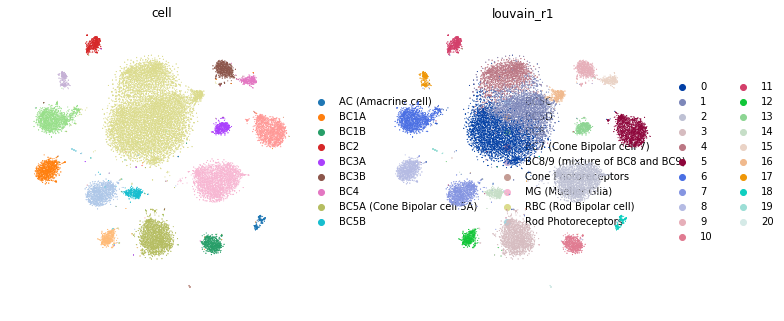

In [4]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','louvain_r1'], frameon=False)

## SCCAF assessment
> use self-projection to test the global accuracy of a clustering (the human expert clustering). 
We find the discrimination between the human annotated cell types is very clear and the accuracy is up to 96%. It shows an almost-perfect clustering.

Mean CV accuracy: 0.9593
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9800


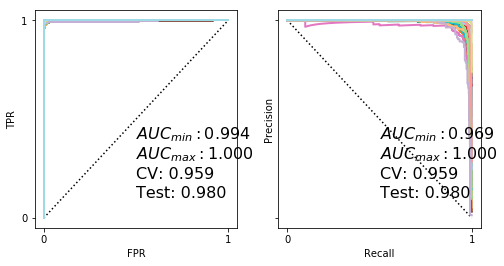

In [5]:
figsize(8,4)
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.X, ad.obs['cell'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

## SCCAF recover
When the data annotation is unknown and we aim to identify the best clustering solution. 
We may start with a `over-clustering` and optimize the clustering by merging the clusters that cannot be discriminated by a machine learning model. 

The selection of start clustering (or pre-clustering, which is an over-clustering) aims to find a clustering with only over-clustering but no under-clustering. To achieve this clustering, we suggest to combine well-established clustering (e.g., louvain clustering in SCANPY or K-means or SC3) with data visualization (tSNE). We can assume that all the discriminative cell clusters should be detectable in the tSNE plot. Then, we can find a clustering (e.g, louvain with a chosen resolution, 1 in this example case) that separates all the "cell islands" in the tSNE plot. To achieve a higher speed, we also suggest to have as few cell cluster as possible. For example, if both resolution 1.0 and resolution 2.0 do not include under-clustering, we suggest to use resolution 1.0 result as the start clustering.

(Here we use `logistic regression`, which uses a linear model, for the machine learning.) And we also constrain the optimization with a `under-clustering`.

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`).

We assign the optimization name (the `prefix` parameter) as `L1`, and the initial state of the optimization is named as `L1_Round0` kept in the `anndata.obs` slot.
Each Round of the optimization will increase the index, from `L1_Round1`, `L1_Round2` to `L1_Round10` ....

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9543
Accuracy on the training set: 0.9812
Accuracy on the hold-out set: 0.9051


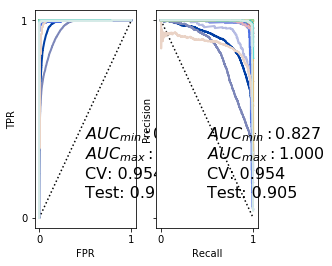

Accuracy on the training set: 0.9807
Accuracy on the hold-out set: 0.9002
Accuracy on the training set: 0.9766
Accuracy on the hold-out set: 0.8975
Max R1mat: 0.466431
Max R2mat: 0.035253
min_acc: 0.897466


<Figure size 288x288 with 0 Axes>

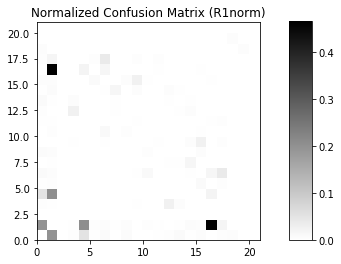

<Figure size 288x288 with 0 Axes>

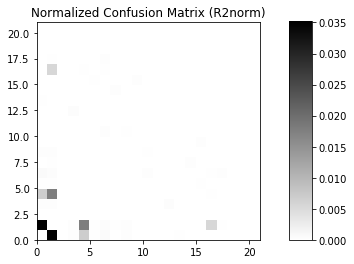

IGRAPH U-W- 21 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.466431
m2: 0.035253
Accuracy: 0.897466
R1norm_cutoff: 0.456431
R2norm_cutoff: 0.034253
Accuracy: 0.897466
Round1 ...
Mean CV accuracy: 0.9574
Accuracy on the training set: 0.9797
Accuracy on the hold-out set: 0.8994


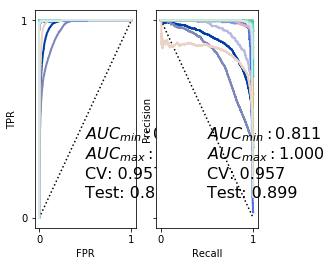

Accuracy on the training set: 0.9756
Accuracy on the hold-out set: 0.9055
Accuracy on the training set: 0.9766
Accuracy on the hold-out set: 0.8988
Max R1mat: 0.500000
Max R2mat: 0.040805
min_acc: 0.898833


<Figure size 288x288 with 0 Axes>

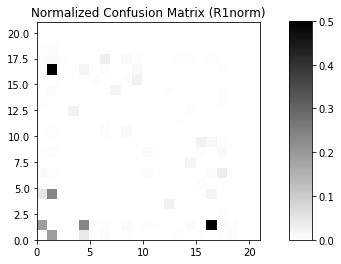

<Figure size 288x288 with 0 Axes>

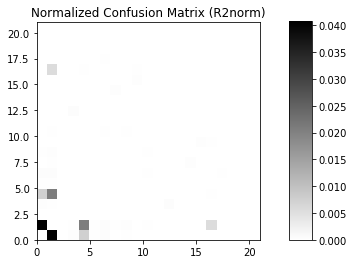

... storing 'L1_Round0_self-projection' as categorical
... storing 'L1_Round1' as categorical


IGRAPH U-W- 21 4 --
+ attr: weight (e)
+ edges:
0--1 0--1 1--16 1--16


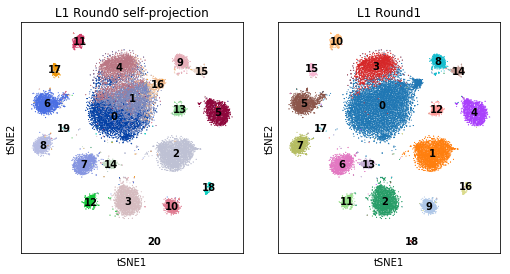

Round2 ...
Mean CV accuracy: 0.9717
Accuracy on the training set: 0.9921
Accuracy on the hold-out set: 0.9285


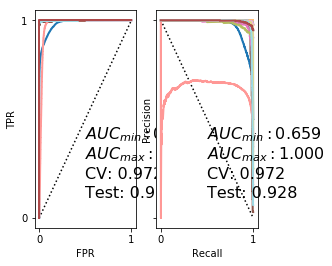

Accuracy on the training set: 0.9904
Accuracy on the hold-out set: 0.9142
Accuracy on the training set: 0.9910
Accuracy on the hold-out set: 0.9320
Max R1mat: 0.636831
Max R2mat: 0.055519
min_acc: 0.914246


<Figure size 288x288 with 0 Axes>

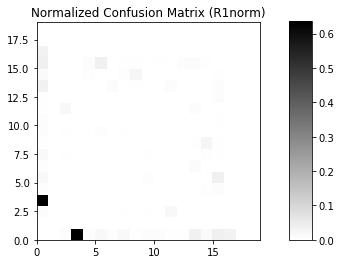

<Figure size 288x288 with 0 Axes>

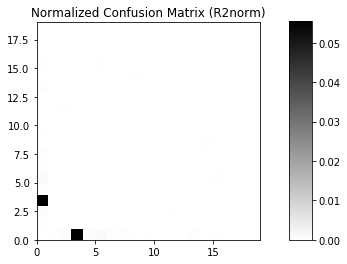

... storing 'L1_Round1_self-projection' as categorical
... storing 'L1_Round2' as categorical


IGRAPH U-W- 19 2 --
+ attr: weight (e)
+ edges:
0--3 0--3


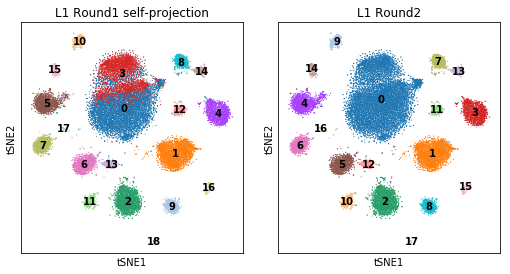

Round3 ...
Mean CV accuracy: 0.9892
Accuracy on the training set: 0.9982
Accuracy on the hold-out set: 0.9910


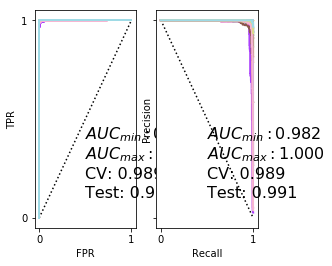

Accuracy on the training set: 0.9982
Accuracy on the hold-out set: 0.9894
Accuracy on the training set: 0.9982
Accuracy on the hold-out set: 0.9904
Max R1mat: 0.034247
Max R2mat: 0.000599
Converge SCCAF_optimize min_acc!
m1: 0.034247
m2: 0.000599
Accuracy: 0.989428
CPU times: user 33.2 s, sys: 1 s, total: 34.2 s
Wall time: 15.4 s


In [6]:
%%time
figsize(4,4)
SCCAF_optimize_all(start="louvain_r1",min_acc=0.96, ad=ad, use='pca', basis ='tsne')

In [10]:
ad.write("../write/Shekhar_reg1.h5")

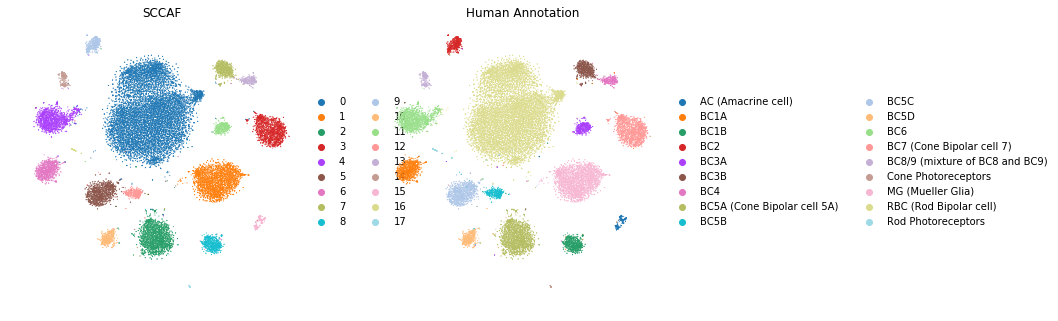

In [9]:
sc.pl.tsne(ad, color=['L1_result','cell',],frameon=False, title=['SCCAF','Human Annotation'])

## SCCAF recover with constraints

In this example, we start with louvain clustering resolution 1.0 (`louvain_r1`) and constrain the optimization with louvain clustering resolution 0.2 (`louvain_r0.2`).

In [8]:
sc.tl.louvain(ad, resolution=0.2, key_added='louvain_r0.2')

... storing 'L1_Round2_self-projection' as categorical
... storing 'L2_Round0_self-projection' as categorical


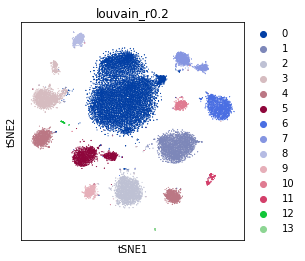

In [9]:
sc.pl.tsne(ad, color=['louvain_r0.2'])

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9548
Accuracy on the training set: 0.9782
Accuracy on the hold-out set: 0.9053


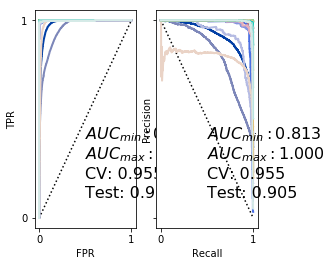

Accuracy on the training set: 0.9843
Accuracy on the hold-out set: 0.9014
Accuracy on the training set: 0.9812
Accuracy on the hold-out set: 0.9053
Max R1mat: 0.568905
Max R2mat: 0.038634
min_acc: 0.901368


<Figure size 288x288 with 0 Axes>

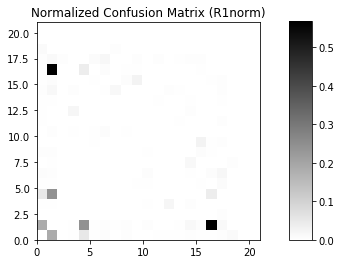

<Figure size 288x288 with 0 Axes>

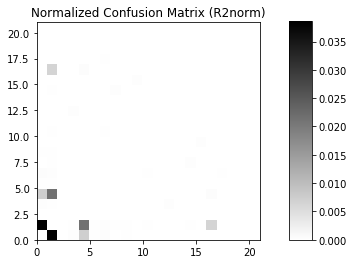

... storing 'L2_Round0_self-projection' as categorical
... storing 'L2_Round1' as categorical


IGRAPH U-W- 21 2 --
+ attr: weight (e)
+ edges:
1--16 1--16


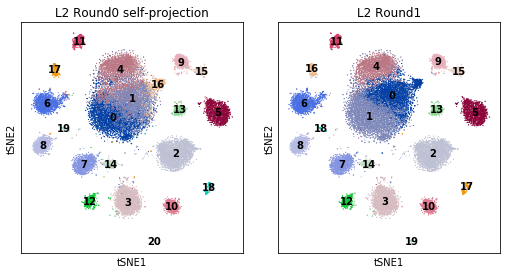

Round2 ...
Mean CV accuracy: 0.9540
Accuracy on the training set: 0.9834
Accuracy on the hold-out set: 0.9207


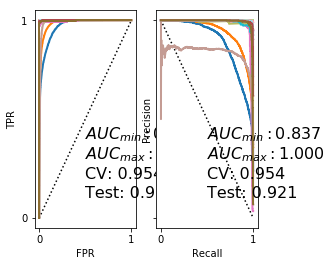

Accuracy on the training set: 0.9877
Accuracy on the hold-out set: 0.9169
Accuracy on the training set: 0.9829
Accuracy on the hold-out set: 0.9116
Max R1mat: 0.243187
Max R2mat: 0.034080
min_acc: 0.911579


<Figure size 288x288 with 0 Axes>

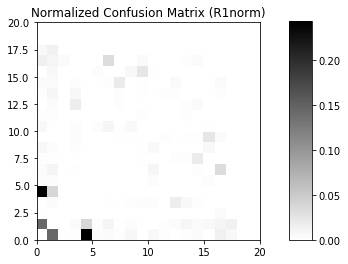

<Figure size 288x288 with 0 Axes>

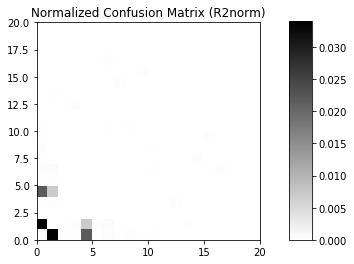

IGRAPH U-W- 20 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.243187
m2: 0.034080
Accuracy: 0.911579
start_iter: 1
R1norm_cutoff: 0.233187
R2norm_cutoff: 0.033080
Accuracy: 0.911579
Round2 ...
Mean CV accuracy: 0.9620
Accuracy on the training set: 0.9813
Accuracy on the hold-out set: 0.9205


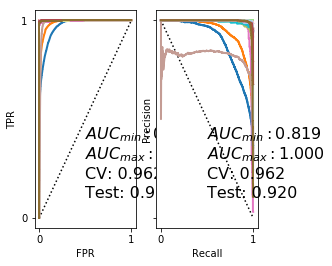

Accuracy on the training set: 0.9845
Accuracy on the hold-out set: 0.9135
Accuracy on the training set: 0.9834
Accuracy on the hold-out set: 0.9149
Max R1mat: 0.275347
Max R2mat: 0.029207
min_acc: 0.913462


<Figure size 288x288 with 0 Axes>

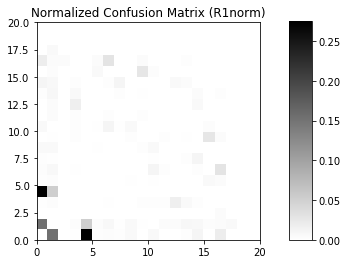

<Figure size 288x288 with 0 Axes>

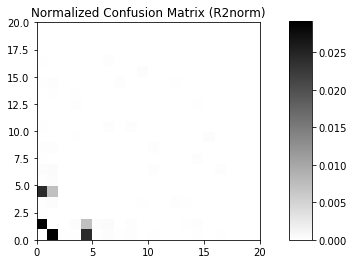

... storing 'L2_Round1_self-projection' as categorical
... storing 'L2_Round2' as categorical


IGRAPH U-W- 20 2 --
+ attr: weight (e)
+ edges:
0--4 0--4


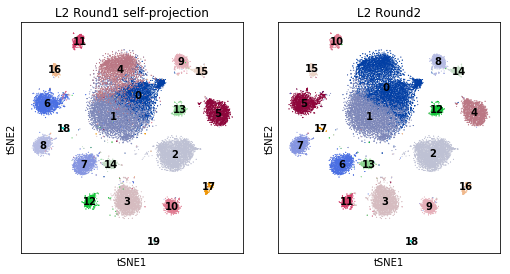

Round3 ...
Mean CV accuracy: 0.9712
Accuracy on the training set: 0.9898
Accuracy on the hold-out set: 0.9450


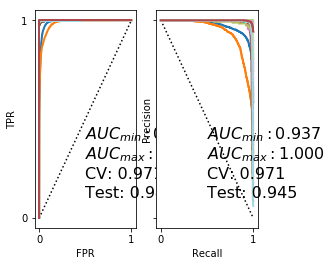

Accuracy on the training set: 0.9932
Accuracy on the hold-out set: 0.9390
Accuracy on the training set: 0.9938
Accuracy on the hold-out set: 0.9420
Max R1mat: 0.178483
Max R2mat: 0.039674
min_acc: 0.938986


<Figure size 288x288 with 0 Axes>

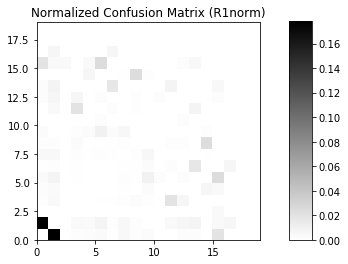

<Figure size 288x288 with 0 Axes>

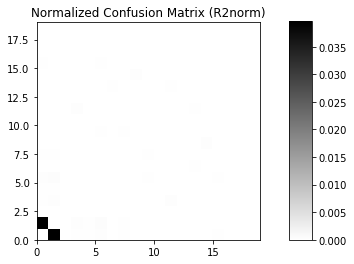

IGRAPH U-W- 19 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.178483
m2: 0.039674
Accuracy: 0.938986
start_iter: 2
R1norm_cutoff: 0.168483
R2norm_cutoff: 0.038674
Accuracy: 0.938986
Round3 ...
Mean CV accuracy: 0.9644
Accuracy on the training set: 0.9887
Accuracy on the hold-out set: 0.9478


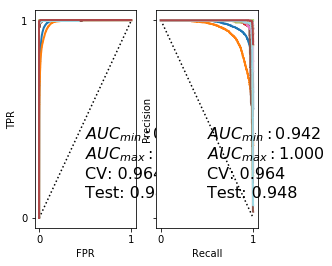

Accuracy on the training set: 0.9921
Accuracy on the hold-out set: 0.9458
Accuracy on the training set: 0.9915
Accuracy on the hold-out set: 0.9429
Max R1mat: 0.156056
Max R2mat: 0.037282
min_acc: 0.942897


<Figure size 288x288 with 0 Axes>

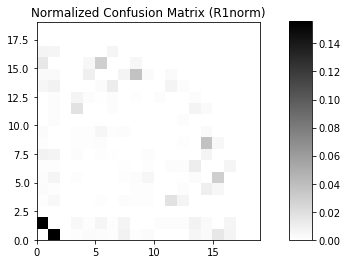

<Figure size 288x288 with 0 Axes>

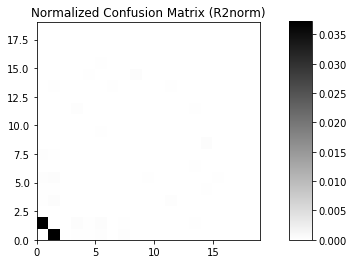

IGRAPH U-W- 19 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.156056
m2: 0.037282
Accuracy: 0.942897
start_iter: 2
R1norm_cutoff: 0.146056
R2norm_cutoff: 0.036282
Accuracy: 0.942897
Round3 ...
Mean CV accuracy: 0.9808
Accuracy on the training set: 0.9921
Accuracy on the hold-out set: 0.9478


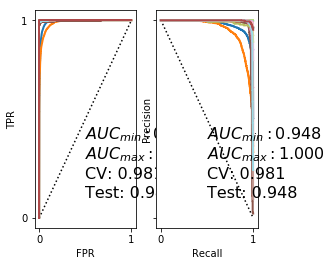

Accuracy on the training set: 0.9932
Accuracy on the hold-out set: 0.9457
Accuracy on the training set: 0.9898
Accuracy on the hold-out set: 0.9375
Max R1mat: 0.162192
Max R2mat: 0.037298
min_acc: 0.937510


<Figure size 288x288 with 0 Axes>

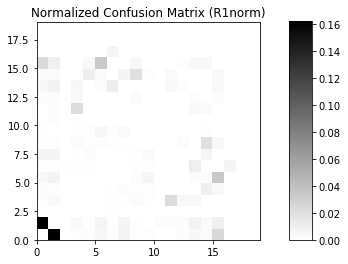

<Figure size 288x288 with 0 Axes>

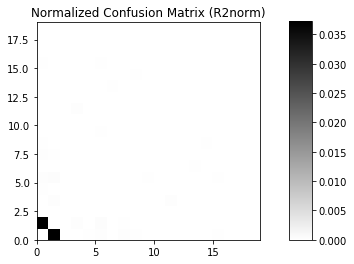

... storing 'L2_Round2_self-projection' as categorical
... storing 'L2_Round3' as categorical


IGRAPH U-W- 19 2 --
+ attr: weight (e)
+ edges:
0--1 0--1


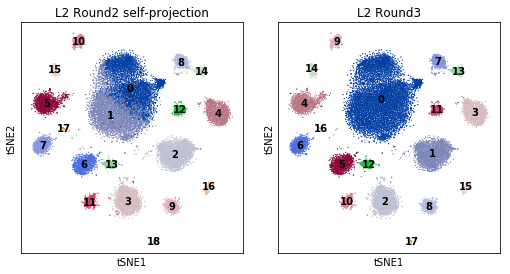

Round4 ...
Mean CV accuracy: 0.9850
Accuracy on the training set: 0.9982
Accuracy on the hold-out set: 0.9906


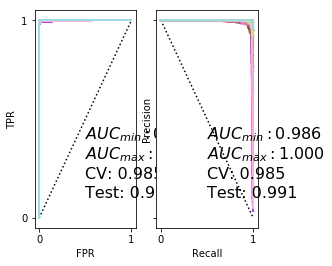

Accuracy on the training set: 0.9994
Accuracy on the hold-out set: 0.9905
Accuracy on the training set: 0.9982
Accuracy on the hold-out set: 0.9909
Max R1mat: 0.034130
Max R2mat: 0.000559
Converge SCCAF_optimize min_acc!
m1: 0.034130
m2: 0.000559
Accuracy: 0.990541
CPU times: user 57.9 s, sys: 1.9 s, total: 59.7 s
Wall time: 26.3 s


In [10]:
%%time
figsize(4,4)
SCCAF_optimize_all(start='L1_Round0',min_acc=0.98, ad=ad, use='pca', basis ='tsne',low_res='louvain_r0.2', prefix='L2')

... storing 'L2_Round3_self-projection' as categorical


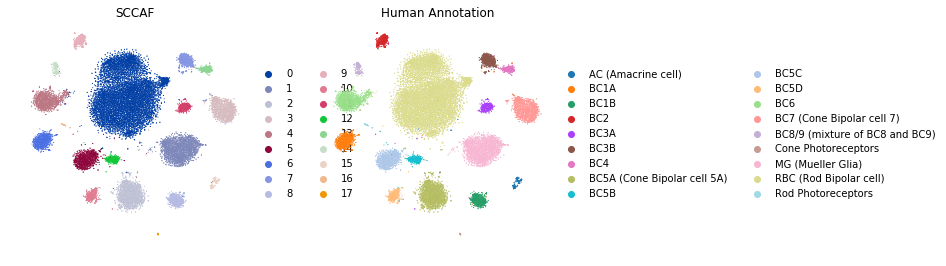

In [11]:
sc.pl.tsne(ad, color=['L2_result','cell',],frameon=False, title=['SCCAF','Human Annotation'])

# End